# Literatura no Brasil: analisando dados do Skoob

O **Skoob** é uma rede social brasileira focada em leitores lançada em 2009. A proposta do site é ser um espaço onde leitores e escritores possam trocar opiniões, indicações, postarem resenhas e avaliações, e até formar grupos e clubes de leitura. Além disso, permite aos usuários organizarem suas leituras, marcarem livros que desejam ler ou que abandonaram.

No conjunto de dados obtido, [Livros Skoob](https://www.kaggle.com/datasets/victorstein/livros-skoob "Livros Skoob | Kaggle"), temos informações sobre os livros e autores, assim como as avaliações dos usuários, se leram, querer ler ou abandonaram a leitura.  Através desses dados, vamos analisar os anos onde mais livros foram lançados, os livros e autores mais populares, os mais bem avaliados, além de outras relações dos usuários com os livros. Veremos também como o gênero impacta os livros e as editoras mais populares e melhor avaliadas.

As colunas são:

* ``titulo`` - O título do livro
* ``autor`` - O autor do livro
* ``ISBN_13`` - Número internacional de identificação do livro com 13 dígitos
* ``ISBN_10`` - Número internacional de identificação do livro com 10 dígitos
* ``ano`` - Ano em que o livro foi publicado
* ``paginas`` - Quantidade de páginas do livro
* ``idioma`` - Idioma da publicação
* ``rating`` - Média das avaliações de 1 a 5
* ``avaliacao`` - Quantidade de avaliações do livro
* ``resenha`` - Quantidade de resenhas do livro
* ``abandonos`` - Quantidade de pessoas que abandonaram o livro
* ``relendo`` - Quantidade de pessoas relendo o livro
* ``querem_ler`` - Quantidade de pessoas que querem ler o livro
* ``lendo`` - Quantidade de pessoas lendo o livro
* ``leram`` - Quantidade de pessoas que já leram o livro
* ``descricao`` - Breve descrição do livro
* ``genero`` - Gêneros do livro
* ``male`` - Percentual de leitores do sexo masculino
* ``female`` - Percentual de leitores do sexo feminino

## Pré-processamento

Vamos começar importando algumas bibliotecas que serão úteis na nossa análise.

In [1]:
# Pandas para manipulação de tabelas de dados (DataFrames)
import pandas as pd
from pandas.api.types import is_numeric_dtype

# Matplotlib para criação de gráficos e diagramas
import matplotlib.pyplot as plt

Agora vamos carregar nossos dados e conferir as primeiras linhas:

In [2]:
df = pd.read_csv('C:/Users/atlas/documents/projetos_dados/datasets/dados-skoob.csv')
df.head()

,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
0,Orçamento sem falhas,Nath Finanças,9.786556e+12,6555601566,2021,128,português,Intrínseca,0.0,0,0,0,0,1,0,0,"Quando o assunto é dinheiro, não dá para achar...","Economia, Finanças / Literatura Brasileira / N...",28,72
1,Minha Sombria Vanessa,Kate Elizabeth Russell,9.788551e+12,8551006274,2020,432,português,Intrínseca,4.3,2,653,48,3,6,389,2,Elogiado por Gillian Flynn e considerado um do...,Drama / Ficção / Literatura Estrangeira / Susp...,7,93
2,Recursão,Blake Crouch,9.788551e+12,8551005375,2020,320,português,Intrínseca,4.4,2,618,22,2,6,295,2,E se um dia memórias vívidas de coisas que nun...,Ficção / Ficção científica / Literatura Estran...,21,79
3,"M, o Filho do Século",Antonio Scurati,9.788551e+12,855100607X,2020,816,português,Intrínseca,4.6,60,12,1,0,951,49,55,"O romance M, o Filho do Século conta em trama ...","Biografia, Autobiografia, Memórias / História ...",37,63
4,Oblivion Song: Entre Dois Mundos,Robert Kirkman,9.788551e+12,8551006258,2020,136,português,Intrínseca,4.1,166,16,0,0,376,6,184,Mestre em traçar universos distópicos permeado...,"Ficção / HQ, comics, mangá / Literatura Estran...",44,56


Vamos ver as informações da tabela:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11975 entries, 0 to 11974
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   titulo      11975 non-null  object 
 1   autor       11971 non-null  object 
 2   ISBN_13     11216 non-null  float64
 3   ISBN_10     11216 non-null  object 
 4   ano         11975 non-null  int64  
 5   paginas     11975 non-null  int64  
 6   idioma      11973 non-null  object 
 7   editora     11974 non-null  object 
 8   rating      11975 non-null  float64
 9   avaliacao   11975 non-null  int64  
 10  resenha     11975 non-null  int64  
 11  abandonos   11975 non-null  int64  
 12  relendo     11975 non-null  int64  
 13  querem_ler  11975 non-null  int64  
 14  lendo       11975 non-null  int64  
 15  leram       11975 non-null  int64  
 16  descricao   11318 non-null  object 
 17  genero      11386 non-null  object 
 18  male        11975 non-null  int64  
 19  female      11975 non-nul

Temos alguns dados em falta nas colunas ``ISBN_13`` e ``ISBN_10``. Como esses valores são os únicos identificadores únicos dos livros, é melhor excluir as linhas com valores ausentes:

In [4]:
df.dropna(subset=['ISBN_13', 'ISBN_10'], inplace=True)

Agora vamos excluir possíveis duplicadas óbvias nos dados:

In [5]:
df.drop_duplicates(inplace=True)

Vamos conferir novamente as informações:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11190 entries, 0 to 11974
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   titulo      11190 non-null  object 
 1   autor       11186 non-null  object 
 2   ISBN_13     11190 non-null  float64
 3   ISBN_10     11190 non-null  object 
 4   ano         11190 non-null  int64  
 5   paginas     11190 non-null  int64  
 6   idioma      11188 non-null  object 
 7   editora     11190 non-null  object 
 8   rating      11190 non-null  float64
 9   avaliacao   11190 non-null  int64  
 10  resenha     11190 non-null  int64  
 11  abandonos   11190 non-null  int64  
 12  relendo     11190 non-null  int64  
 13  querem_ler  11190 non-null  int64  
 14  lendo       11190 non-null  int64  
 15  leram       11190 non-null  int64  
 16  descricao   10637 non-null  object 
 17  genero      10691 non-null  object 
 18  male        11190 non-null  int64  
 19  female      11190 non-nul

Excluímos as linhas sem ISBN e também algumas duplicatas. A coluna ``ISBN_10``  está formatada como string e não como valor numérico. Vamos conferir se essa coluna realmente possui caracteres não-números:

In [7]:
is_numeric_dtype(df.ISBN_10)

False

A coluna não é de fato númerica. Sendo assim, não vamos convertê-la. Livros com poucos leitores podem distorcer nossas análises, é interessante retirá-los. Vamos consultar alguns dados sobre essa coluna para decidir como retirar os livros menos populares:

In [8]:
df['leram'].describe()

count    11190.000000
mean       124.899643
std        206.089360
min          0.000000
25%          5.000000
50%         29.000000
75%        136.000000
max        999.000000
Name: leram, dtype: float64

50% dos livros tem menos que 29 leitores, enquanto que a média de leitores é de 124,9. Vamos criar um filtro para que restem apenas os livros com pelo menos 29 leitores.

In [9]:
df_2 = df[(df['leram']>=29)]

df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5605 entries, 3 to 11974
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   titulo      5605 non-null   object 
 1   autor       5605 non-null   object 
 2   ISBN_13     5605 non-null   float64
 3   ISBN_10     5605 non-null   object 
 4   ano         5605 non-null   int64  
 5   paginas     5605 non-null   int64  
 6   idioma      5605 non-null   object 
 7   editora     5605 non-null   object 
 8   rating      5605 non-null   float64
 9   avaliacao   5605 non-null   int64  
 10  resenha     5605 non-null   int64  
 11  abandonos   5605 non-null   int64  
 12  relendo     5605 non-null   int64  
 13  querem_ler  5605 non-null   int64  
 14  lendo       5605 non-null   int64  
 15  leram       5605 non-null   int64  
 16  descricao   5504 non-null   object 
 17  genero      5501 non-null   object 
 18  male        5605 non-null   int64  
 19  female      5605 non-null 

## Análise exploratória de dados (EDA)

Vamos iniciar nossa investigação explorando os dados. Primeiro, vamos observar como as publicações se distribuem por ano. Vejamos alguns cálculos sobre os dados da coluna:

In [10]:
df_2['ano'].describe()

count    5605.000000
mean     2010.435861
std        38.601055
min         0.000000
25%      2007.000000
50%      2012.000000
75%      2016.000000
max      2020.000000
Name: ano, dtype: float64

A data máxima de publicações é 2020, mas a data mínima é 0, que provavelmente corresponde a um erro nos dados. Não temos como saber quantos valores errados existem além do 0, então é interessante filtrar para excluir esses valores quando criarmos exibições. Vamos ver quais são os 10 anos com maior número de publicações.

In [11]:
# Criando uma tabela organizada por ano
ano_pub = df_2.groupby('ano', as_index=False).agg({'ISBN_10':'nunique'})

# Análise dos livros por ano
ano_pub.sort_values(by='ISBN_10', ascending=False).head(10)

,ano,ISBN_10
42,2017,435
38,2013,377
41,2016,351
40,2015,345
44,2019,344
39,2014,343
43,2018,338
37,2012,324
35,2010,291
36,2011,291


2017 foi o campeão em número de publicações cadastradas no site, seguido por 2013 e 2016. Como os dados da plataforma não informam sobre a indústria, isso não quer dizer que o número de publicações caiu depois de 2017, apenas que esse foi o ano com mais livros cadastrados pelos usuários da plataforma.

Vamos criar um gráfico de linha para observar melhor essa variação. É interessante incluir um filtro para evitar valores incorretos e incomuns. Decidimos exibir apenas livros publicados entre 2000 e 2020, uma vez que esse período concentra a maior parte das obras.

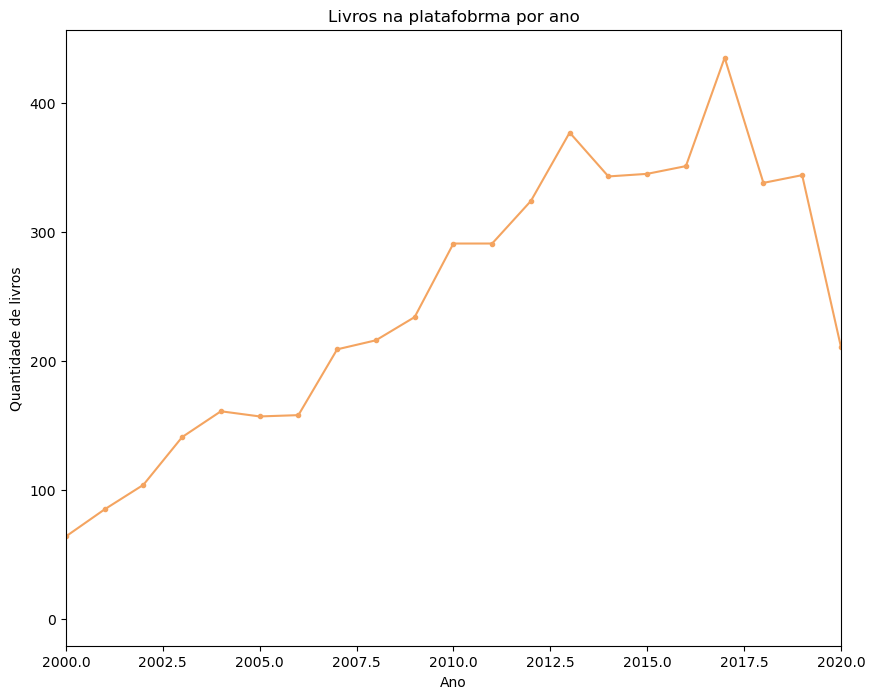

In [12]:
plt.figure(figsize=(10,8))
plt.plot(ano_pub['ano'], ano_pub['ISBN_10'], marker='.', color='sandybrown')
plt.title('Livros na platafobrma por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de livros')
plt.xlim([2000, 2020])
plt.show()

Realmente 2017 representou um pico no cadastramento de títulos na plataforma. Sem dúvida, os livros publicados em 2017 foram mais incluídos na plataforma do que qualquer outro ano até 2020. É possível que isso tenha acontecido pela popularidade do site entre os usuários ter sido maior nesse ano que em outros.

Vamos analisar agora especificamente os dados sobre leituras de livros em relação a seu ano de publicação. Primeiro, os 10 anos onde as publicações têm o maior número de leituras.

In [13]:
# Análise dos livros lidos por ano
ano_pop = df_2.groupby('ano', as_index=False).agg({'leram':'sum'})
ano_pop.sort_values(by='leram', ascending=False).head(10)

,ano,leram
42,2017,125480
40,2015,100224
44,2019,100206
41,2016,99946
43,2018,93441
37,2012,93075
39,2014,92635
38,2013,91609
35,2010,72023
36,2011,63441


Novamente, os livros publicados em 2017 têm o maior número de leitores. Em seguida temos 2015, 2019 e 2016 praticamente empatados. De qualquer forma, a variação entre 8 primeiros anos não é tão grande, o que sugere que não há uma preferência explicíta dos leitores por livros de certo ano em relação aos outros.

Agora vamos observar como as leituras se distribuem de acordo com o ano de publicação dos livros. Em um gráfico de linha, vamos ver a quantidade de leitura das publicações por ano, de 2000 a 2020.

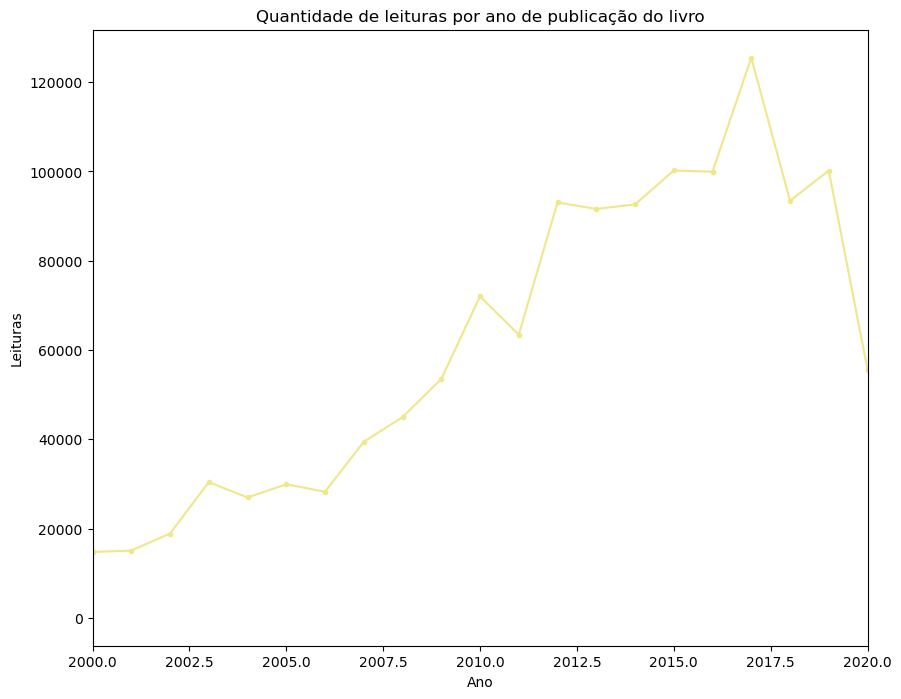

In [14]:
plt.figure(figsize=(10,8))
plt.plot(ano_pop['ano'], ano_pop['leram'], marker='.', color='khaki')
plt.title('Quantidade de leituras por ano de publicação do livro')
plt.xlabel('Ano')
plt.ylabel('Leituras')
plt.xlim([2000, 2020])
plt.show()

2017 é novamente o ano em que os livros publicados tiveram mais leituras. Existem algumas variações, mas no geral o gráfico é bem similar ao anterior. Pode-se dizer que há certa relação entre os anos com mais publicações cadastradas na plataforma e os anos cujos livros tiveram maior número de leitores.

É interessante analisar a distribuição do número de páginas por livro. Para isso, vamos criar um histograma para livros com até 1000 páginas.

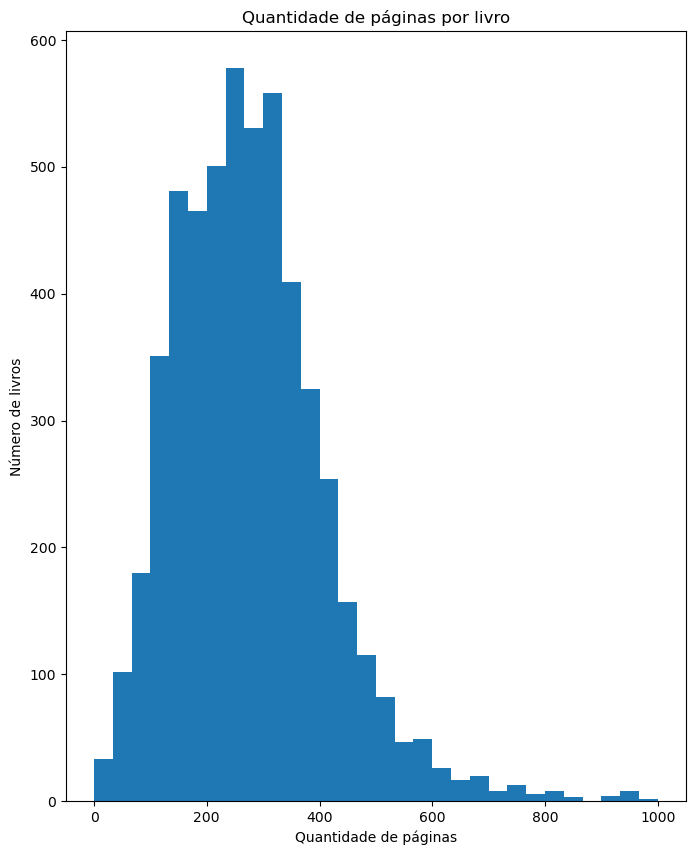

In [15]:
# Criando a tabela de livros com suas páginas (valores médios para livros com mais de um volume)
pg_df = df_2.groupby('ISBN_10', as_index=False).agg({'paginas':'mean'})

# Criando o histograma para livros com até 1000 páginas
plt.figure(figsize=(8,10))
plt.hist(pg_df['paginas'], bins=30, range=(0,1000))
plt.title('Quantidade de páginas por livro')
plt.ylabel('Número de livros')
plt.xlabel('Quantidade de páginas')
plt.show()

A grande maior dos livros têm entre cerca de 150 e 350 páginas. Vamos ver alguns dados da distribuição.

In [16]:
pg_df['paginas'].describe()

count    5352.000000
mean      280.808903
std       158.690823
min         0.000000
25%       179.750000
50%       266.000000
75%       352.000000
max      4606.000000
Name: paginas, dtype: float64

A média de páginas por livro é de 280,81, já a mediana é de 266. Isso indica certa assimetria positiva da distribuição, ou seja, que há livros muito grandes que estão distorcendo um pouco a média. O maior livro da plataforma, por exemplo, tem 4606 páginas, mesmo que 75% dos livros tenham menos que 352 páginas.

Agora vamos ver os livros mais bem avaliados da plataforma. Primeiro, vamos avaliar como se distribui a quantidade de avaliações por livro, para filtrar nossa tabela de livros pouco avaliados.

In [17]:
df_2['avaliacao'].describe()

count    5605.000000
mean      161.181088
std       170.376807
min         1.000000
25%        38.000000
50%        87.000000
75%       227.000000
max       950.000000
Name: avaliacao, dtype: float64

Podemos excluir o primeiro quartil, deixando apenas livros com mais de 38 avaliações. Para isso, vamos criar outro DataFrame e agrupá-lo por **ISBN_10**, **autor** e **titulo**, utilizando a média da nota (**rating**)), caso haja mais que uma, e a quantidade de avaliações como critério de desempate. Vamos adicionar também a média da quantidade de páginas de cada livro, para averiguar se é possível dizer algo sobre o comprimento dessas obras.

In [18]:
# Criando a nova tabela
rt_df = df_2[df_2['avaliacao']>38]

# Calculando os 20 livros mais bem avaliados
rt_df.groupby(['ISBN_10', 'autor', 'titulo']).agg({'rating':'mean', 'avaliacao':'sum', 'paginas':'mean'}).sort_values(
    by=['rating', 'avaliacao'], ascending=False).head(20)

,,,rating,avaliacao,paginas
ISBN_10,autor,titulo,,,
8532522610,J.K. Rowling,Harry Potter e as Relíquias da Morte,4.80,327,565.000000
854310954X,Ana Claudia Quintana Arantes,Histórias lindas de morrer,4.80,282,224.000000
8532530842,J.K. Rowling,Harry Potter e as Relíquias da Morte,4.80,273,511.500000
8532530834,J.K. Rowling,Harry Potter e o Enigma do Príncipe,4.80,155,432.000000
8576867664,Francine Rivers,Um Eco Na Escuridão,4.80,120,462.000000
8532522610,J.K. Rowling,Harry Potter e As Relíquias da Morte,4.80,109,551.000000
8532531822,J.K. Rowling,Harry Potter e as Relíquias da Morte,4.80,109,640.000000
8551006665,Riad Sattouf,O Árabe do Futuro,4.80,43,288.000000
853253080X,J.K. Rowling,Harry Potter e o Prisioneiro de Azkaban,4.75,358,288.000000


A autora mais bem representada é a J.K Rowling, com os 8 volumes da saga Harry Potter presentes na lista. Os outros autores tem apenas um livro cada na lista, com excessão de Sir Arthur Conan Doyle que consta com um box de 4 volumes, mas ocupando apenas uma posição. A quantidade de páginas vai de 48 a 1808, porém, a maioria das obras está entre 100 e 600, o que é um espectro bem amplo, considerando a distribuição das páginas.

Agora vejamos como a avaliação média varia por autor, com a quantidade de avaliações servindo como critério de desempate novamente. Vamos adicionar também a informação sobre a quantidade de publicações na plataforma.

In [19]:
rt_df.groupby(['autor']).agg({'rating':'mean', 'avaliacao':'sum', 'ISBN_10':'nunique'}).sort_values(
    by=['rating', 'avaliacao'], ascending=False).head(20)

,rating,avaliacao,ISBN_10
autor,,,
Ana Claudia Quintana Arantes,4.800000,282,1
Rena Kornreich Gelissen,4.700000,672,1
Lupita Nyongo,4.700000,510,1
Yaa Gyasi,4.700000,505,1
Mark Salisbury,4.700000,329,1
Mark Sullivan,4.700000,218,1
Ana Michelle Soares,4.700000,205,1
Andrea Wulf,4.700000,114,1
Rogério Feltrin,4.700000,102,1


Com essa nova configuração, J.K. Rowling mal entrou nos 20 primeiros colocados. Isso provavelmente pode ser relacionado a quantidade de livros publicados, uma vez que a maioria dos autores na lista tem apenas uma publicação. Mais publicações significa um risco maior de receber avaliações baixas.

Vamos ver se podemos dizer algo sobre a popularidade dos gêneros. Podemos calcular a quantidade de livros em cada gênero, exibindo os 10 gêneros com mais livros.

In [20]:
df_2['genero'].value_counts().head(10)

                                              1282
                                               370
Ficção / Literatura Estrangeira / Romance      171
Literatura Estrangeira                         117
Ficção / Literatura Estrangeira                102
Literatura Estrangeira / Romance                86
Autoajuda                                       48
Infantojuvenil                                  45
Ficção                                          44
Romance                                         37
Name: genero, dtype: int64

A maioria dos livros tem mais de um gênero, o que era permitido na plataforma, de modo que dificulta uma avaliação mais precisa dos gêneros mais populares. Mas podemos concluir que Ficção, Literatura Estrangeira, Romance, Autoajuda e Infantojuvenil são os gêneros mais populares, embora não seja possível identificar exatamente a ordem de popularidade.

Vamos observar os 20 livros mais lidos. Para isso, agruparemos nossa tabela por **ISBN_10**, **autor** e **titulo**, e calcularemos o total de pessoas que leram, adicionaremos o ano "mínimo" da publicação (caso haja mais de um ano) e a média de páginas.

In [21]:
# Livros mais lidos
df_2.groupby(['ISBN_10', 'autor', 'titulo']).agg({'leram':'sum', 'ano':'min', 'paginas':'mean'}).sort_values(
    by=['leram'], ascending=False).head(20)

,,,leram,ano,paginas
ISBN_10,autor,titulo,,,
8501091049,Conn Iggulden,O Livro Perigoso para Garotos (de bolso),2490,2010,286.666667
8580572142,Tom Perrotta,Os deixados para trás,1952,2012,320.000000
8532513484,Ricardo Semler,Virando a Própria Mesa,1834,1988,231.500000
8580411556,Jonathan Tropper,Sete Dias Sem Fim,1798,2013,304.000000
8580574943,Cressida Cowell,Como trair o herói de um dragão,1756,2014,492.000000
858679659X,Lawrence C. Katz,Mantenha o Seu Cérebro Vivo,1714,2000,151.000000
8598078379,Markus Zusak,A Menina que Roubava Livros,1675,2007,421.800000
8550303550,J. R. Ward,A Ladra,1668,2018,464.000000
8532511864,Nick Hornby,Febre de Bola,1546,1992,248.000000


Entre os 10 mais lidos, há um livro de cada escritor. J.K. Rowling ficou entre as últimas posições do top 20 novamente dessa vez. Com excessão de 3 livros, os outros foram publicados depois dos anos 2000. É clara a preferência dos usuários do Skoob por livros publicados mais recentemente, mesmo que em reedições. A distribuição da quantidade de páginas é similar ao que encontramos nos livros mais bem avaliados, variam principalmente entre 100 e 600 páginas.

Vejamos os livros mais abandonados seguindo o mesmo modelo.

In [22]:
# Os livros mais abandonados
df_2.groupby(['ISBN_10', 'autor', 'titulo']).agg({'abandonos':'sum', 'ano':'min'}).sort_values(
    by=['abandonos','autor', 'titulo'], ascending=False).head(20)

,,,abandonos,ano
ISBN_10,autor,titulo,,
853251166X,J.K. Rowling,Harry Potter e a Câmara Secreta,2862,2000
8580570085,Rick Riordan,O Herói Perdido,2448,2011
8532519474,J.K. Rowling,Harry Potter e o Enigma do Príncipe,2424,2005
8576651963,Paulo Coelho,Veronika Decide Morrer,2373,2006
8532512062,J.K. Rowling,Harry Potter e o Prisioneiro de Azkaban,2211,2000
8532522610,J.K. Rowling,Harry Potter e as Relíquias da Morte,2145,2007
853250812X,Clarice Lispector,A Hora da Estrela,1986,1998
8501089656,Lauren Kate,Êxtase,1911,2013
8580573017,R. J. Palacio,Extraordinário,1726,2013


Nesta lista há uma forte presença de J.K. Rowling, que encabeça a lista com **Harry Potter e a Câmara Secreta**. No geral, a lista é formada por escritores bem conhecidos, como Clarice Lispector, Margaret Atwood, Paulo Coelho e Stephenie Meyer. Possivelmente a popularidade desses escritores atraiu leitores que acabaram não apreciando as obras.

Vejamos os livros mais desejados.

In [23]:
# Os livros mais desejados
df_2.groupby(['ISBN_10', 'autor', 'titulo']).agg({'querem_ler':'sum', 'ano':'min'}).sort_values(
    by=['querem_ler','autor', 'titulo'], ascending=False).head(20)

,,,querem_ler,ano
ISBN_10,autor,titulo,,
855030459X,J. R. Ward,O Salvador,1978,2019
6555600039,Emma Jane Unsworth,Adultos,1912,2020
8501091049,Conn Iggulden,O Livro Perigoso para Garotos (de bolso),1665,2010
858679659X,Lawrence C. Katz,Mantenha o Seu Cérebro Vivo,1622,2000
8532507603,Roberto DaMatta,"Carnavais, malandros e heróis",1404,1994
8542208242,Richard J. Evans,Terceiro Reich no Poder,1290,2017
8542208927,Shusaku Endo,Silêncio,1262,2017
8579302765,Alberto Dell'isola,Mentes Geniais,1260,2011
8542208714,Richard J. Evans,Terceiro Reich em Guerra,1214,2017


Existe certa relação com os autores dos livros mais lidos. Isso indica uma relação de fidelidade dos leitores, ou pelo menos, que os leitores tendem a buscar mais livros do autor uma vez que tenham gostado do que leram.

Agora vamos ver os livros mais relidos.

In [24]:
# os livros mais relidos
df_2.groupby(['ISBN_10', 'autor', 'titulo']).agg({'relendo':'sum', 'ano':'min'}).sort_values(
    by=['relendo','autor', 'titulo'], ascending=False).head(20)

,,,relendo,ano
ISBN_10,autor,titulo,,
8598078379,Markus Zusak,A Menina que Roubava Livros,4385,2007
853251622X,J.K. Rowling,Harry Potter e a Ordem da Fênix,2516,2003
853251166X,J.K. Rowling,Harry Potter e a Câmara Secreta,2286,2000
8532522610,J.K. Rowling,Harry Potter e as Relíquias da Morte,2064,2007
8532519474,J.K. Rowling,Harry Potter e o Enigma do Príncipe,1924,2005
8532512062,J.K. Rowling,Harry Potter e o Prisioneiro de Azkaban,1827,2000
8580573807,John Green,A Culpa é das Estrelas,1510,2013
8532512526,J.K. Rowling,Harry Potter e o Cálice de Fogo,1400,2001
8572322647,Machado de Assis,Dom Casmurro,1104,2007


É possível ver a releitura do livro como uma confirmação da fidelidade dos leitores as obras. Entre eles estão vários livros da J.K. Rolling novamente, alguns *best-sellers* modernos, como A cabana e A culpa é das estrelas, e ainda um clássico da literatura brasileira, Dom Casmurro. É importante apontar que existem livros repetidos com anos de publicação e ISBN diferentes, o que indica serem edições diferentes dos mesmos livros.

Analisaremos agora os mesmos pontos, mas agrupando por autor e não por publicação. Vamos começar pelos autores mais lidos, e adicionarem o ano "mínimo", ou seja, o ano do livro mais antigo do autor, isso pode nos ajudar a entender as preferências dos usuários. Vamos adicionar também a quantidade de publicações de cada autor.

In [25]:
# autores mais lidos
df_2.groupby(['autor']).agg({'leram':'sum', 'ano':'min', 'ISBN_10':'nunique'}).sort_values(
    by=['leram'], ascending=False).head(20)

,leram,ano,ISBN_10
autor,,,
J.K. Rowling,16745,2000,36
Clarice Lispector,12095,1976,33
Rubem Alves,10896,2002,35
R. L. Stine,9853,2000,32
James Patterson,9609,2001,18
Rick Riordan,8068,2008,35
Ken Follett,7920,1997,13
Sara Shepard,7121,2014,15
John Grisham,6909,1995,21


Com excessão de Clarice Lispector, os autores no top 20 tem seus livros mais antigos na plataforma publicados a partir de 1990. Podemos interpretar, que os usuários do Skoob preferem autores mais recentes, surgidos nas últimas duas décadas. Também vemos como parece haver uma relação entre número de publicações e número de leitores, o que faz sentido. Vamos ver como a quantidade de livros desses autores se compara com a distribuição geral.

In [26]:
df_2.groupby('autor').agg({'ISBN_10':'nunique'}).describe()

,ISBN_10
count,2907.000000
mean,1.847265
std,2.494190
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,36.000000


75% dos autores têm menos que 2 livros publicados. O número é de 36 publicações, o mesmo da primeira colocada no ranking de mais lidos, J.K. Rowling. Vemos como há uma relação entre quantidade de livros publicados e número de leitores.

Vejamos os autores mais abandonados.

In [27]:
# autores mais abandonados
df_2.groupby(['autor']).agg({'abandonos':'sum', 'ano':'min'}).sort_values(
    by=['abandonos'], ascending=False).head(20)

,abandonos,ano
autor,,
J.K. Rowling,20666,2000
Rick Riordan,14197,2008
Paulo Coelho,8931,1989
Cassandra Clare,7790,2010
R. J. Palacio,5180,2013
Clarice Lispector,5118,1976
Nicholas Sparks,3845,2012
Lauren Kate,3725,2010
Becca Fitzpatrick,3691,2010


Vemos que muitos dos autores mais lidos estão também entre os mais abandonados. É uma relação similar como a que ocorria entre livros mais lidos e mais abandonados.

E agora, os autores mais desejados.

In [28]:
# autores mais desejados
df_2.groupby(['autor']).agg({'querem_ler':'sum', 'ano':'min'}).sort_values(
    by=['querem_ler'], ascending=False).head(20)

,querem_ler,ano
autor,,
James Patterson,10700,2001
Clarice Lispector,8980,1976
Rubem Alves,8015,2002
Alain de Botton,7011,1993
Sara Shepard,6716,2014
J.K. Rowling,6346,2000
John Grisham,6302,1995
Daniel Silva,5182,1999
J. R. Ward,5104,2011


Os resultados são também similares aos autores mais lidos e mais abandonados. Esses três indicadores dizem sobre a popularidade dos autores. Uma quantidade alta de abandono pode indicar também boas estratégias de marketing efetivas aplicadas a livros com pouco apelo ao leitor.

Vejamos os autores mais relidos.

In [29]:
# Autores mais relidos
df_2.groupby(['autor']).agg({'relendo':'sum', 'ano':'min'}).sort_values(
    by=['relendo'], ascending=False).head(20)

,relendo,ano
autor,,
J.K. Rowling,22468,2000
Stephenie Meyer,9605,2008
Rick Riordan,8201,2008
Markus Zusak,7893,2007
John Green,5835,2012
Cassandra Clare,3270,2010
Dan Brown,2225,2004
Paulo Coelho,1845,1989
E.L. James,1746,2012


É importante considerar a presença de autores que escreveam/escrevem sagas, como JK, Stephenie Meyer e Rick Riordan nas primeiras colocações. Eles também estavam presentes na lista de autores mais lidos. Aqui também temos a presença de escritores que não surgiram tanto nas outras listas, como JRR Tolkien e Douglas Adams, também conhecidos por sagas. Isso aponta como a escrever séries literárias ajuda a atrair e fidelizar leitores.

É interessante observar como os hábitos de leitura variam por gênero. Temos nos nossos dados os valores do percentual de leitores que declararam ser do sexo masculino e do sexo feminino de cada livro. Mas antes de calcularmos, vamos reduzir nossa tabela a apenas os livros com certa popularidade. Para isso, vamos ver detalhes sobre a distribuição dos dados.

In [30]:
df_2['leram'].describe()

count    5605.000000
mean      241.326673
std       239.950478
min        29.000000
25%        61.000000
50%       136.000000
75%       341.000000
max       999.000000
Name: leram, dtype: float64

Vamos utilizar apenas os 50% de livros com maior número de leitores dessa vez. Como critério de desempate, consideraremos o número de leitores.

In [31]:
# Filtrando a tabela
fm_df = df_2[df_2['leram']>136]

# Imprimindo os 10 autores com maior percentual de leitoras do sexo feminino
fm_df.groupby('autor').agg({'female':'mean', 'leram':'sum'}).sort_values(by=['female', 'leram'], ascending=False).head(10)

,female,leram
autor,,
Inês Stanisiere,100.0,411
Suzanne Enoch,100.0,343
Drica Pinotti,99.6,2410
Bruna Mazzali,99.0,1246
Karen Marie Moning,99.0,1016
J.S. Cooper / Helen Cooper,99.0,913
Brittainy Cherry,99.0,789
Julia Quinn,99.0,779
Madeline Hunter,99.0,672


Vejamos agora os mais populares para leitores do sexo masculino, para podermos comparar as listas.

In [32]:
fm_df.groupby('autor').agg({'male':'mean', 'leram':'sum'}).sort_values(by=['male', 'leram'], ascending=False).head(10)

,male,leram
autor,,
Phil Jackson,84.000000,250
Marcos Eduardo Neves,81.000000,157
Orlando Paes Filho,75.500000,1347
Alice Schroeder,75.000000,1006
Greg Bear,75.000000,314
Mary Buffet,74.000000,190
Mary Buffet e David Clark,74.000000,190
Andy McNab,73.000000,754
Michael Lewis,72.333333,541


Praticamente todos os nomes na lista com maior percentual de leitores do sexo feminino são de mulheres. Na lista de autores com maior percentual de leitores do sexo masculino existem duas mulheres. É possível enxergar que há uma preferências de pessoas do sexo feminino por escritoras mulheres e de pessoas do sexo masculino por autores homens.

Vejamos a quantidade de livros de cada idioma na plataforma.

In [33]:
# Os idiomas mais populares na plataforma
df_2.groupby('idioma').agg({'ISBN_10':'nunique'}).sort_values(by='ISBN_10', ascending=False)

,ISBN_10
idioma,
português,5325
inglês,29
espanhol,3


Como é de esperar, a maioria dos livros cadastradas na plataforma é em Português, com alguns poucos livros em inglês e apenas 3 em espanhol. Vamos ver quantas leituras há por idioma.

In [34]:
# Os idiomas mais lidos na plataforma
df_2.groupby('idioma').agg({'leram':'sum'}).sort_values(by='leram', ascending=False)

,leram
idioma,
português,1346340
inglês,5565
espanhol,731


A organização se mantém a mesma, mas é possível ver que há muitas pessoas que leram os livros em inglês e espanhol na plataforma.

É interessante observar como as publicações se distribuem por editora. Vamos calcular as 10 editoras com maior número de livros publicados cadastrados na plataforma.

In [35]:
# As editoras com mais publicações
ed_pub = df_2.groupby('editora', as_index=False).agg({'ISBN_10':'nunique'}).sort_values(by='ISBN_10', ascending=False).head(10)
ed_pub

,editora,ISBN_10
47,Rocco,1456
50,Sextante,714
44,Planeta,631
32,Intrínseca,611
20,Galera,406
55,Universo,329
57,Verus,243
4,Arqueiro,201
27,HarperCollins,191
13,Editora,184


Temos a editora **Rocco** em destaque, com mais que o dobro do número de publicações que o segundo lugar, a editora **Sextante**. Da segunda a quarta colocação os números são similares, voltando a cair de forma mais significativa a partir da quinta colocada, a editora **Galera**. No décimo lugar há **Editora**, provavelmente o valor informado quando os usuários não sabem o nome da publicante. Vamos criar um gráfico de barras para observar melhor a diferença entre o número de livros por editora.

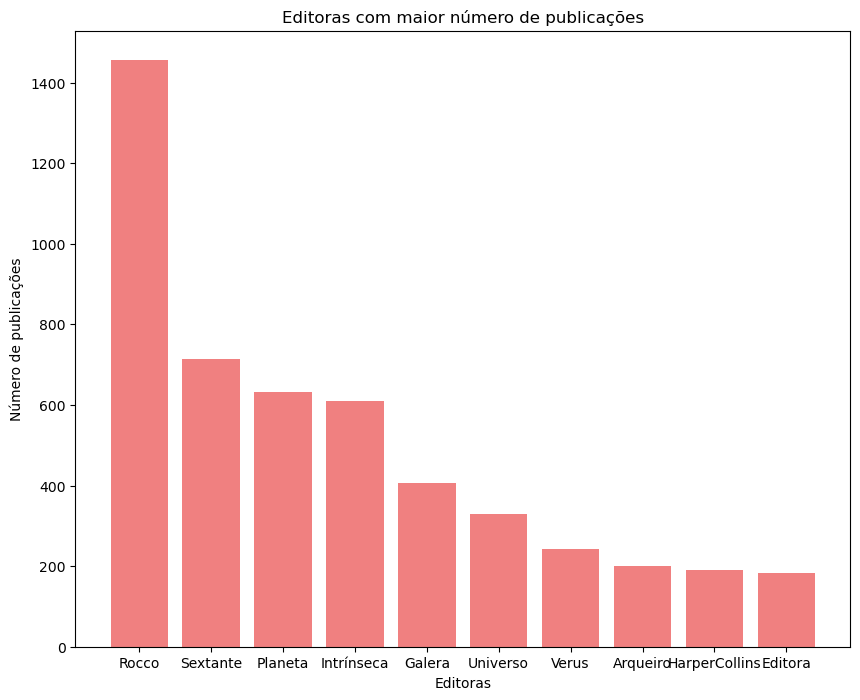

In [36]:
plt.figure(figsize=(10,8))
plt.bar(ed_pub['editora'], ed_pub['ISBN_10'], color='lightcoral')
plt.title('Editoras com maior número de publicações')
plt.ylabel('Número de publicações')
plt.xlabel('Editoras')
plt.show()

A quantidade de livros da editora **Rocco** é muito maior que as outras colocadas. Não temos informações sobre a quantidade de vendas, portanto não é possível afirmar se essa editora realmente domina o mercado literário brasileiro, mas, com esses dados, podemos ver como os usuários do Skoob cadastraram muito mais livros dessa editora que de todas as outras.

Talvez essa configuração mude vendo o número de leitores por editora. Vamos calcular isso.

In [37]:
# As editoras mais lidas
ed_pop = df_2.groupby('editora', as_index=False).agg({'leram':'sum'}).sort_values(by='leram', ascending=False).head(10)
ed_pop

,editora,leram
47,Rocco,305388
32,Intrínseca,196743
50,Sextante,155865
44,Planeta,138409
20,Galera,116922
4,Arqueiro,87665
55,Universo,80335
57,Verus,66973
27,HarperCollins,52445
13,Editora,40237


A Rocco permaneceu na primeira colocação, mas a editora Intrínseca saltou algumas posições no ranking, indo do quarto lugar no número de livros para o segundo na quantidade de leitores. A editora Arqueiro também subiu uma posição em relação a quantidade de livros. Porém, as editoras nas duas listas são exatamente as mesmas. Vamos observar também como esses valores se apresentam em um gráfico de barras.

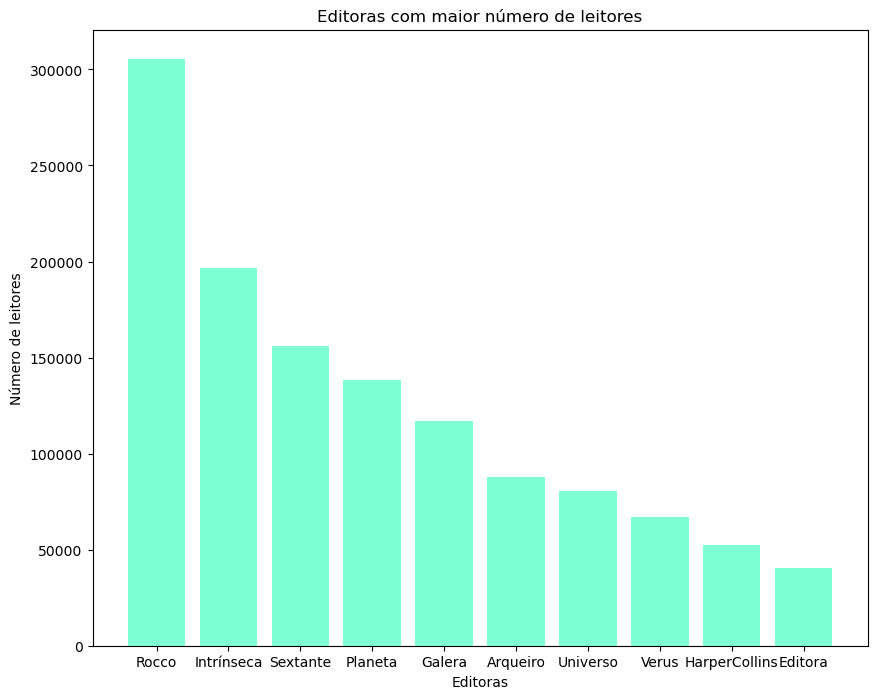

In [38]:
plt.figure(figsize=(10,8))
plt.bar(ed_pop['editora'], ed_pop['leram'], color='aquamarine')
plt.title('Editoras com maior número de leitores')
plt.ylabel('Número de leitores')
plt.xlabel('Editoras')
plt.show()

Vemos como a Rocco ainda permanece na dianteira, mas agora está mais próxima das outras. Talvez as outras editoras façam escolhas de publicações de forma mais precisa que a Rocco, tendo menos títulos, mas um sucesso relativo maior. Vamos calcular a quantidade de leitores por livro de cada editora.

In [39]:
# Juntando as tabelas
ed_df = ed_pop.merge(ed_pub, on='editora')

# Calculando a média de leitores
ed_df['media_leitores'] = ed_df['leram']/ed_df['ISBN_10']

# Exibindo o resultado
ed_df.sort_values(by='media_leitores', ascending=False)

,editora,leram,ISBN_10,media_leitores
5,Arqueiro,87665,201,436.144279
1,Intrínseca,196743,611,322.001637
4,Galera,116922,406,287.985222
7,Verus,66973,243,275.609053
8,HarperCollins,52445,191,274.581152
6,Universo,80335,329,244.179331
3,Planeta,138409,631,219.348653
9,Editora,40237,184,218.679348
2,Sextante,155865,714,218.298319
0,Rocco,305388,1456,209.744505


Calculando a média de leitores na plataforma por livro publicado, Rocco cai para o décimo lugar na lista. Arqueiro, Intrínseca e Galera sobem para o pódio. O que fica aparente é que essas editoras, apesar de publicarem menos títulos, fazem apostas mais acertadas, conseguindo, em média, mais leitores que editoras com maior número de livros, como Rocco, Sextante e Planeta.

Porém, esse ranking traz apenas as 10 editoras mais populares. Vamos construir um de todas as editoras e ver quais as que tem a maior efetividade nas publicações e adicionar também a média de páginas dos livros de cada editora.

In [40]:
# Criando uma nova tabela com o número de publicações por editora
ed_pub2 = df_2.groupby('editora', as_index=False).agg({'ISBN_10':'nunique'}).sort_values(by='ISBN_10', ascending=False)

# Criando uma nova com o número de leitores por editora
ed_pop2 = df_2.groupby('editora', as_index=False).agg({'leram':'sum', 'paginas':'mean'}).sort_values(by='leram', ascending=False)

# Criando adicionando o número de publicações a tabela com o número de leitores
ed_pop2['publicacoes'] = ed_pub2['ISBN_10']

# Calculando a média de leitores por publicação
ed_pop2['media_leitores'] = ed_pop2['leram']/ed_pop2['publicacoes']

# Exlcuindo as editoras com menos de 10 publicações
ed_pop2 = ed_pop2[ed_pop2['publicacoes']>10]

# Imprimindo as 10 primeiras linhas
ed_pop2.sort_values(by='media_leitores', ascending=False).head(10)

,editora,leram,paginas,publicacoes,media_leitores
46,Record,4864,305.727273,11,442.181818
4,Arqueiro,87665,350.931034,201,436.144279
56,Valentina,16297,264.600000,49,332.591837
32,Intrínseca,196743,337.712349,611,322.001637
35,Martin,21425,248.026667,73,293.493151
20,Galera,116922,313.561485,406,287.985222
57,Verus,66973,256.766129,243,275.609053
27,HarperCollins,52445,323.614583,191,274.581152
24,Gutenberg,25765,285.860000,99,260.252525
55,Universo,80335,248.744118,329,244.179331


Exlcuindo editoras muito pequenas, com menos de 10 publicações, temos uma lista um pouco diferente das anteriores. Ainda temos Arqueiro, Intrínseca, Universo, Galera e HarperCollins, mas os outros nomes todos mudaram. Em primeiro lugar temos a Record, com apenas 11 publicações, mas uma média de cerca de 442 leitores por livro. Já a Arqueiro vem em segundo, seguido por Valentina, uma adição a lista. Outras editoras como Martin, Verus e Gutenberg são adições em relação as listas anteriores. O tamanho médio dos livros dessas editoras fica entre 244 e 442 páginas, talvez evitar extremos (livros muito grande ou pequenos demais) ajude na melhoria do indicativo de leitores por publicação.

Podemos dizer que há uma diferença considerável entre número de publicações e média de leitores por publicação. Isso pode apontar também para diferentes estratégias empresariais das editoras, sendo mais ou menos seletivos em suas escolhas editoriais.

## Conclusões

A maior parte dos livros tem entre 150 e 350 páginas (média 280,81 e mediana de 266). Os livros mais lidos, por sua vez, tendem a ficar na parte superior dessa distribuição, entre 200 e 600 páginas, assim como os livros mais bem avaliados.

Vimos os leitores e autores mais lidos, desejados, relidos abandonados. Foi possível observar como séries literárias ajudam os autores a terem uma base de fãs, que não só compram suas obras como costumam relê-las. Pudemos observar como autores com maiores percentuais de leitores de cada sexo variam: autores homens figurando mais na lista dos maiores percentuais de leitores do sexo masculino, e autoras mulheres sendo exclusividade na lista de livros com maior percentual do sexo feminino. Observamos também como os livros e autores variam em relação as médias de suas avaliações.

Por fim, analisamos as editoras. Vimos as que possuiam mais publicações registradas na plataforma, as que tinham mais leitores e criamos um indicativo própria: média de leitores por publicação. Através desse indicativo, vimos como um número alto de publicações e de leitores nem sempre se reflete numa média de leitores por publicação alto. Isso pode ser relacionado as diferentes estratégias de cada editora, com algumas sendo mais seletivas que outras em suas decisões do que publicar. Também notamos que a média de páginas por publicação das editoras que se saíram melhor nesse indicativo estão na parte inferior da distribuição geral, o que pode demonstrar que evitar tamanhos de livros extremos (muito grandes ou muito pequenos) pode ajudar na média de leitores por publicação.

[Visualização no Tableau Public com bases no conjunto de dados](https://public.tableau.com/app/profile/diego.laurentino.de.carvalho/viz/LivrosSkoob/DadosdoSkoob?publish=yes 'Livros Skoob no Tableu Public')